<a href="https://colab.research.google.com/github/burakozkarabekir/burakozkarabekir/blob/main/Data%20Science%20Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Covid-19 and Character Strengths- Group 18]

Group Members:
Ayşenur Güller,
Emre Coşkuner,
Berkin Divrikli,
Halil Serbey Celep,
Burak Özkarabekir.

## Introduction

<font color="black">
The COVID-19 pandemic affected people by creating negative psychological consequences due to self-isolation terms, health worries and lockdowns. The data that collected from 944 people that have different characteristics strengths. This project focuses on reflecting the protective role of character strengths, lockdown related self-efficacy by analyzing the given dataset. The project, especially will be focusing on DASS which is Depression Anxiety and Stress Scale, try to determine the strength factors which increases those values. Strength factors are the ones which constitutes DASS values. Openness level, which is the level of a person’s imagination, curiosity and open mindedness. Restraint is control over thought or feelings. Transcendence is the most complete version of a human. Interpersonal is relating communication or relationship of people.
</font>

### Problem Definition

<font color="black">
First and foremost, rather than specifying a problem and attempting to find a possible null solution to the problem we created, it would be more accurate to identify this project as the most possible heuristic approach to exploring the main dataset(DB), constructing a better understanding of the entire concept that we are dealing with, and coming up with profound and effective predictions and foundations. 

Furthermore, we acted in a more experimenting and investigating manner. To generalize, we want to extract details from our data and support the details with intriguing outcomes from our supplement datasets in order to identify hidden relations and diverse aspects buried in the dataset.
</font>


We therefore hypothesize that transcendence and restraint second-order strengths may relate to lower levels of psychological distress (i.e. depression, anxiety and stress), and higher levels of Covid-19-related self-efficacy.


### Utilized Datasets

<font color="black">

Data refers to an analysis of the protective role of character strengths on personal stress and anxiety levels during pandemic period. The dataset contains participants numbered, strengths factors which are "Openness, Restrain, Transcendence, Interpersonal", constant measures which are DASS21, GHQ12, SEC and personality informations that are age, gender, work, being a student and days passed when the responses collected from participants and lastly, son number. After these datasets, characteristic strengths such as creativity, hope, leadership, love are recorded in the given excel file. However, in our project, we will only use strength 4 factors which are Openness, Restrain, Transcendence, Interpersonal to find correlation between these strength factors and psychological distress and self-efficacy.

The data is accessed from an excel file which can be found from the link: https://www.kaggle.com/mathchi/covid19-and-character-strengths
</font>

**1.Adding libraries and mounting google drive process**

In [ ]:
from google.colab import drive
drive.mount("./drive")

path_prefix = "./drive/My Drive"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import numpy as np



%matplotlib inline

import folium
from folium import plugins
from folium.plugins import HeatMap
import seaborn as sns


import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats



Mounted at ./drive


**2.Adding files to the notebook**


In [ ]:
#In order to open DB excel
df = pd.read_excel('DB.xlsx')

#In order to make sure not to make any change on actual data
df_c = df.copy()


**a. Data detailed overview**

In [ ]:
df_c.shape

(944, 41)

*Columns are as follows*

In [ ]:
df_c.columns

Index(['Participant', 'Openness', 'Restraint', 'Transcendence',
       'Interpersonal', 'DASS_21', 'GHQ_12', 'SEC', 'Age', 'Gender', 'Work',
       'Student', 'Day', 'Sons', 'Appreciation_of_beauty', 'Bravery',
       'Creativity', 'Curiosity', 'Fairness', 'Forgiveness', 'Gratitude',
       'Honesty', 'Hope', 'Humilty', 'Humor', 'Judgment', 'Kindness',
       'Leadership', 'Love', 'Love_of_learning', 'Perseverance', 'Perspective',
       'Prudence', 'Self_regulation', 'Social_intelligence', 'Spirituality',
       'Teamwork', 'Zest', 'DASS_anxiety', 'DASS_depression', 'DASS_stress'],
      dtype='object')

*Datatypes are as follows*

In [ ]:
df_c.dtypes

Participant                int64
Openness                   int64
Restraint                  int64
Transcendence              int64
Interpersonal              int64
DASS_21                    int64
GHQ_12                     int64
SEC                        int64
Age                        int64
Gender                    object
Work                       int64
Student                   object
Day                        int64
Sons                       int64
Appreciation_of_beauty     int64
Bravery                    int64
Creativity                 int64
Curiosity                  int64
Fairness                   int64
Forgiveness                int64
Gratitude                  int64
Honesty                    int64
Hope                       int64
Humilty                    int64
Humor                      int64
Judgment                   int64
Kindness                   int64
Leadership                 int64
Love                       int64
Love_of_learning           int64
Perseveran

General Look and some changes in the data for the data exploration

In [ ]:
df_c.head()

,Participant,Openness,Restraint,Transcendence,Interpersonal,DASS_21,GHQ_12,SEC,Age,Gender,Work,Student,Day,Sons,Appreciation_of_beauty,Bravery,Creativity,Curiosity,Fairness,Forgiveness,Gratitude,Honesty,Hope,Humilty,Humor,Judgment,Kindness,Leadership,Love,Love_of_learning,Perseverance,Perspective,Prudence,Self_regulation,Social_intelligence,Spirituality,Teamwork,Zest,DASS_anxiety,DASS_depression,DASS_stress
0,1,102,51,116,121,15,24,11,26,Female,5,Student,7,0,19,17,17,16,21,19,20,22,17,18,16,20,23,18,19,20,12,13,18,13,16,15,22,20,0,7,8
1,2,96,49,121,100,18,15,20,25,Male,1,Other,7,0,18,16,16,17,20,17,16,18,16,15,15,16,19,14,19,17,15,18,15,20,15,17,15,18,4,5,9
2,3,99,58,120,87,0,7,20,26,Male,1,Other,7,0,15,16,16,17,16,14,18,16,19,16,19,22,16,13,20,14,15,19,17,22,17,11,12,15,0,0,0
3,4,119,68,131,84,15,18,18,25,Female,6,Other,7,0,22,15,22,25,17,12,19,24,25,11,13,25,20,13,20,23,21,19,24,15,21,12,11,19,1,4,10
4,5,127,61,151,97,37,19,14,49,Female,5,Other,7,1,21,18,25,24,12,20,21,25,21,18,20,23,17,12,19,25,24,20,18,24,15,21,18,21,14,8,15


In [ ]:
df_c.isnull().sum()

Participant               0
Openness                  0
Restraint                 0
Transcendence             0
Interpersonal             0
DASS_21                   0
GHQ_12                    0
SEC                       0
Age                       0
Gender                    0
Work                      0
Student                   1
Day                       0
Sons                      0
Appreciation_of_beauty    0
Bravery                   0
Creativity                0
Curiosity                 0
Fairness                  0
Forgiveness               0
Gratitude                 0
Honesty                   0
Hope                      0
Humilty                   0
Humor                     0
Judgment                  0
Kindness                  0
Leadership                0
Love                      0
Love_of_learning          0
Perseverance              0
Perspective               0
Prudence                  0
Self_regulation           0
Social_intelligence       0
Spirituality        

As we can see clearly, there is different data types as int64 and object. So make our data more usable, we will change our object types to int64

In [ ]:
df_c.replace(to_replace={'Student': 1, 'Other': 2}, inplace=True)
df_c.replace(to_replace={'Male': 0, 'Female': 1}, inplace=True)
df_c.fillna(0,inplace=True)
df_c[['Student','Gender']]= df_c[['Student','Gender']].astype('int64')

In [ ]:
df_c['Student'].dtypes

dtype('int64')

In [ ]:
df_c['Gender'].dtypes

dtype('int64')

NOW our data, filled and converted:


Student categarization --> 'Nan' : 0 , 'Student': 1, 'Other' : 2


Gender categorization --> 'Male' : 0 , 'Female' :1

## Data Exploration

<font color="blue">



</font>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

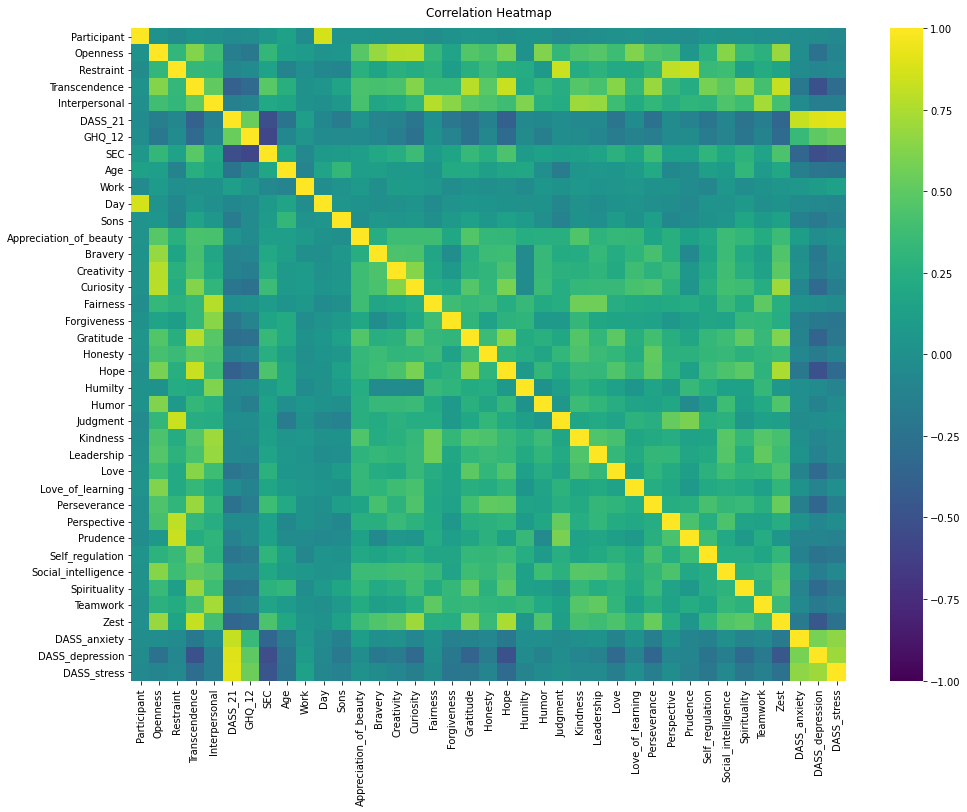

In [ ]:
plt.figure(figsize=(16,12))

heatmap = sns.heatmap(df.corr(), vmin=-1,vmax=1, annot=False, cmap='viridis')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

We can observe correlation by using heatmap above; however, the second correlation matrix below makes more visible to correlation values.


We know that if correlation value close to -1.0 and 1.0, it means that this features should be considered as correlated.




In [ ]:
df_c.corr().style.background_gradient(cmap = 'coolwarm')

,Participant,Openness,Restraint,Transcendence,Interpersonal,DASS_21,GHQ_12,SEC,Age,Gender,Work,Student,Day,Sons,Appreciation_of_beauty,Bravery,Creativity,Curiosity,Fairness,Forgiveness,Gratitude,Honesty,Hope,Humilty,Humor,Judgment,Kindness,Leadership,Love,Love_of_learning,Perseverance,Perspective,Prudence,Self_regulation,Social_intelligence,Spirituality,Teamwork,Zest,DASS_anxiety,DASS_depression,DASS_stress
Participant,1.000000,0.018884,-0.034683,0.016458,-0.007119,-0.046547,-0.029228,0.061140,0.142776,0.027044,-0.044403,0.059938,0.869331,0.024884,0.026917,0.015966,0.005817,0.001652,-0.019942,0.010965,0.042355,0.029870,-0.002932,0.011262,0.017721,-0.046966,-0.029442,-0.003115,0.003560,0.030463,-0.012686,-0.010895,-0.030764,0.037130,0.003383,0.022408,-0.010288,-0.008207,-0.018924,-0.037014,-0.061920
Openness,0.018884,1.000000,0.315537,0.630345,0.387138,-0.147312,-0.201355,0.322560,0.112904,0.046978,0.086299,0.094093,0.028623,0.052001,0.468788,0.686254,0.774876,0.784498,0.331435,0.156417,0.456840,0.413101,0.589311,0.010874,0.620856,0.328111,0.437212,0.465995,0.368336,0.624951,0.445094,0.407638,0.059705,0.281299,0.638837,0.350679,0.276370,0.689509,-0.019626,-0.250185,-0.089921
Restraint,-0.034683,0.315537,1.000000,0.328195,0.316970,-0.072261,-0.044429,0.150577,-0.104228,-0.050195,-0.011408,-0.097449,-0.063034,-0.086515,0.266998,0.165372,0.272516,0.226704,0.273649,0.104614,0.257860,0.352669,0.260682,0.230422,0.079344,0.838381,0.232938,0.284607,0.204349,0.215539,0.305091,0.798545,0.831302,0.350470,0.371930,0.122507,0.218780,0.171009,-0.041797,-0.082790,-0.060519
Transcendence,0.016458,0.630345,0.328195,1.000000,0.513709,-0.388356,-0.317032,0.484073,0.258876,0.114400,0.000675,0.196031,0.042210,0.163203,0.427999,0.413436,0.428193,0.631138,0.334513,0.333955,0.788226,0.481434,0.831065,0.203216,0.325707,0.245263,0.461881,0.421725,0.633457,0.333288,0.688731,0.328909,0.231908,0.580909,0.496804,0.689620,0.400859,0.821833,-0.191410,-0.502161,-0.291852
Interpersonal,-0.007119,0.387138,0.316970,0.513709,1.000000,-0.139882,-0.086882,0.197236,0.165334,0.131538,0.018217,0.110254,-0.005076,0.064679,0.415677,0.173837,0.217102,0.310027,0.781171,0.646541,0.469001,0.430819,0.376918,0.610098,0.268008,0.228298,0.710431,0.685877,0.373031,0.225105,0.314356,0.249019,0.297641,0.281591,0.441167,0.373887,0.732263,0.399868,-0.045035,-0.154674,-0.150450
DASS_21,-0.046547,-0.147312,-0.072261,-0.388356,-0.139882,1.000000,0.542600,-0.522303,-0.231172,0.085493,0.115008,-0.165732,-0.067518,-0.167623,0.027746,-0.095430,-0.103761,-0.216456,-0.009740,-0.207655,-0.270450,-0.129482,-0.397533,-0.060552,-0.065839,-0.021413,-0.055989,-0.059664,-0.225422,-0.041509,-0.255393,-0.034856,-0.113842,-0.218664,-0.089951,-0.240996,-0.148709,-0.346221,0.826773,0.891888,0.908111
GHQ_12,-0.029228,-0.201355,-0.044429,-0.317032,-0.086882,0.542600,1.000000,-0.575032,-0.062711,0.046372,0.043860,-0.111274,-0.041684,-0.047335,-0.045052,-0.083325,-0.154854,-0.243198,0.012629,-0.098437,-0.246132,-0.072532,-0.309932,-0.034320,-0.143188,-0.024021,-0.037057,-0.078423,-0.172559,-0.102372,-0.159835,-0.044785,-0.038538,-0.174408,-0.099810,-0.216596,-0.108447,-0.311941,0.346771,0.504342,0.549923
SEC,0.061140,0.322560,0.150577,0.484073,0.197236,-0.522303,-0.575032,1.000000,0.180730,-0.058968,-0.058003,0.145433,0.071508,0.100703,0.113921,0.196891,0.247732,0.366645,0.089811,0.166862,0.341931,0.255678,0.430313,0.100743,0.143329,0.108881,0.123868,0.162360,0.279975,0.185767,0.369691,0.130403,0.129277,0.298356,0.190733,0.284517,0.161165,0.436768,-0.346848,-0.530895,-0.472578
Age,0.142776,0.112904,-0.104228,0.258876,0.165334,-0.231172,-0.062711,0.180730,1.000000,-0.018326,-0.100812,0.532728,0.163953,0.326759,0.116259,0.120525,0.082846,0.081442,0.033933,0.216701,0.210768,0.118098,0.179365,0.193445,-0.008966,-0.170842,0.039640,0.057493,0.051937,0.095358,0.205221,-0.065255,-0.036902,0.121929,0.100514,0.313342,0.087124,0.192688,-0.144162,-0.223978,-0.227666
Gender,0.027044,0.046978,-0.050195,0.114400,0.131538,0

SOME OBSERVATIONS FROM ABOVE


As we can see on the correlation matrix, **DASS_21**, **GHQ_12** and **SEC** mostly correlated with

DASS_anxiety
DASS_depression
DASS_stress





Thus, in order to understand which features mostly influence DASS scores of the given datasets we should drop them from the dataset. 



We choose our targets as DASS_anxiety, DASS_depression ,DASS_stress


In [ ]:
df_c= df_c.drop(['DASS_21', 'GHQ_12', 'SEC'],axis=1)

Since we do not need to observe participation numbers, we will drop this column


In [ ]:
df_c = df_c.drop(['Participant'], axis=1)

Also, it can be observed that 'Openness, Restrain, Transcedence, Interpersonal' affects our target on the same correlation. Therefore, we can drop these features to make more clear observations in our data.


In [ ]:
df_c =df_c.drop(['Openness','Restraint','Transcendence',
           'Interpersonal'],axis=1)

In [ ]:
features = df_c.iloc[:,3:-3]

In [ ]:
features.columns.values.tolist()

['Student',
 'Day',
 'Sons',
 'Appreciation_of_beauty',
 'Bravery',
 'Creativity',
 'Curiosity',
 'Fairness',
 'Forgiveness',
 'Gratitude',
 'Honesty',
 'Hope',
 'Humilty',
 'Humor',
 'Judgment',
 'Kindness',
 'Leadership',
 'Love',
 'Love_of_learning',
 'Perseverance',
 'Perspective',
 'Prudence',
 'Self_regulation',
 'Social_intelligence',
 'Spirituality',
 'Teamwork',
 'Zest']

## Machine Learning Models

<font color="black">
We will use classification and regression machine learning models to analyze and inspect our work. By using regression algorithms, we will predict values according to our data and our hypothesis. Likewise, classification algorithm will help us to divide the participants and classify. The rest work will be shown in our final project.
</font>

**TESING AND COMPARING DIFFERENT CLASSIFICATION MODEL**


In [ ]:
df_c.DASS_anxiety.describe()

count    944.000000
mean       2.909958
std        3.337398
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       20.000000
Name: DASS_anxiety, dtype: float64

In [ ]:
X = df_c.drop(['DASS_anxiety', 'DASS_stress','DASS_depression'], axis=1)
y = df_c['DASS_anxiety']
print('Anxiety Distribution:')
print(y.value_counts())

Anxiety Distribution:
0     224
1     208
2     132
3     100
4      69
6      46
5      45
8      26
7      26
11     14
9      12
10     12
12      8
13      5
14      5
15      5
16      3
17      2
18      1
20      1
Name: DASS_anxiety, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

In [ ]:
X.head()

,Age,Gender,Work,Student,Day,Sons,Appreciation_of_beauty,Bravery,Creativity,Curiosity,Fairness,Forgiveness,Gratitude,Honesty,Hope,Humilty,Humor,Judgment,Kindness,Leadership,Love,Love_of_learning,Perseverance,Perspective,Prudence,Self_regulation,Social_intelligence,Spirituality,Teamwork,Zest
0,26,1,5,1,7,0,19,17,17,16,21,19,20,22,17,18,16,20,23,18,19,20,12,13,18,13,16,15,22,20
1,25,0,1,2,7,0,18,16,16,17,20,17,16,18,16,15,15,16,19,14,19,17,15,18,15,20,15,17,15,18
2,26,0,1,2,7,0,15,16,16,17,16,14,18,16,19,16,19,22,16,13,20,14,15,19,17,22,17,11,12,15
3,25,1,6,2,7,0,22,15,22,25,17,12,19,24,25,11,13,25,20,13,20,23,21,19,24,15,21,12,11,19
4,49,1,5,2,7,1,21,18,25,24,12,20,21,25,21,18,20,23,17,12,19,25,24,20,18,24,15,21,18,21


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


rf = RandomForestClassifier(n_estimators=100, max_depth = 3, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

(660, 30) (284, 30) (660,) (284,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

*Accurarcy*: Accuracy is the value that the machine learning algorithm calculated by dividing true positive and true negative values over all observations. Having accuracy value close to 1 means that the machine learning algorithm that created having good predictions over observations. 

In [ ]:

from sklearn import metrics
max_acc=-1
index=-1
for i in range(1,40):
  rf  = RandomForestClassifier(max_depth=i)
  
  rf.fit(X_train, y_train)
  pred_rf = rf.predict(X_test)
  acc=metrics.accuracy_score(y_test, pred_rf)
  print("Accuracy of the random forest model: ",acc,"best at depth",i)
  if max_acc < acc:
    max_acc=acc
    index=i
  
print("Accuracy of the random forest model: ",max_acc,"best at depth",index)

Accuracy of the random forest model:  0.22535211267605634 best at depth 1
Accuracy of the random forest model:  0.23591549295774647 best at depth 2
Accuracy of the random forest model:  0.2535211267605634 best at depth 3
Accuracy of the random forest model:  0.2676056338028169 best at depth 4
Accuracy of the random forest model:  0.2640845070422535 best at depth 5
Accuracy of the random forest model:  0.28169014084507044 best at depth 6
Accuracy of the random forest model:  0.24295774647887325 best at depth 7
Accuracy of the random forest model:  0.2676056338028169 best at depth 8
Accuracy of the random forest model:  0.21830985915492956 best at depth 9
Accuracy of the random forest model:  0.25704225352112675 best at depth 10
Accuracy of the random forest model:  0.2711267605633803 best at depth 11
Accuracy of the random forest model:  0.24647887323943662 best at depth 12
Accuracy of the random forest model:  0.2535211267605634 best at depth 13
Accuracy of the random forest model:  0.

In [ ]:
rf=RandomForestClassifier(max_depth=index)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
rf.feature_importances_

array([0.04141226, 0.00786086, 0.02636383, 0.00594283, 0.03168259,
       0.00971056, 0.0393916 , 0.04577988, 0.03814076, 0.04093127,
       0.03087008, 0.03736741, 0.03493663, 0.03279387, 0.03159685,
       0.03491517, 0.03203472, 0.02978259, 0.03804024, 0.03182846,
       0.04083515, 0.03712639, 0.03768977, 0.03442727, 0.04134769,
       0.04032705, 0.03939292, 0.03916169, 0.03499629, 0.03331334])

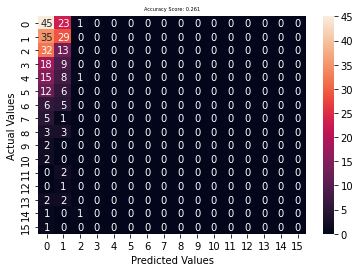

In [ ]:
predictions = rf.predict(X_test)


score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 5)
plt.show()

              precision    recall  f1-score   support

           0       0.25      0.65      0.36        69
           1       0.28      0.45      0.35        64
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1

    accuracy                           0.26       284
   macro avg       0.03   

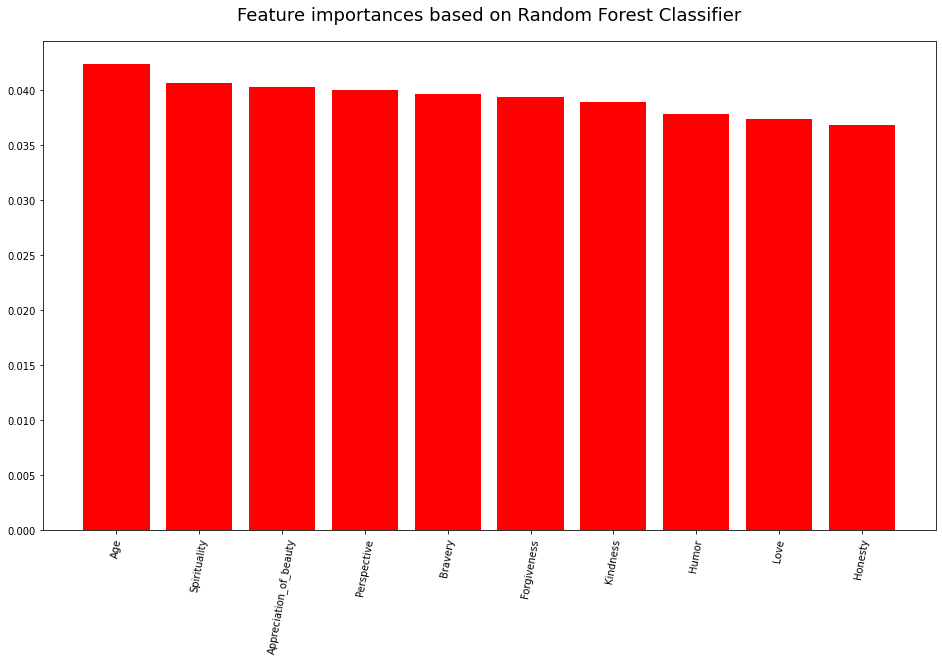

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

rf = RandomForestClassifier(n_estimators=100, max_depth = 8, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

print(classification_report(y_test, predictions))
plt.figure(figsize=(16, 9))

ranking = rf.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.title("Feature importances based on Random Forest Classifier", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="Red", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

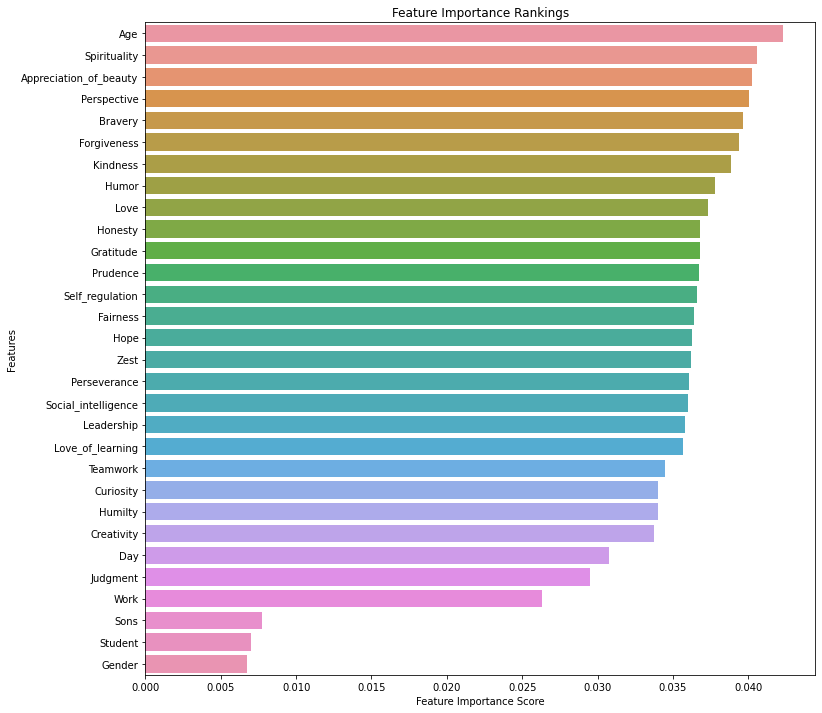

In [ ]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importances, y=feature_importances.index)

# Add labels to our graph  
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

Since the accuracy score that we get here is not close to 1, it is observed that our machine learning algorithm is not succesful in making predictions over observations. To have better accuracy, we need to change our features to observe DASS_levels.

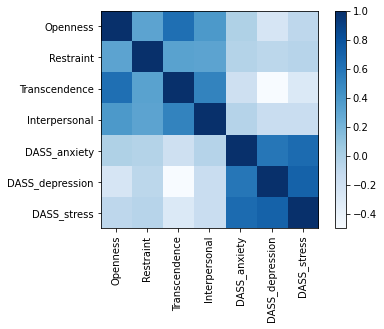

In [ ]:
df_new = df.copy()
df_corr = df_new.drop(["Participant","DASS_21", "GHQ_12","SEC","Age","Work","Day","Sons",
                    "Appreciation_of_beauty","Bravery","Creativity","Curiosity","Fairness",
                    "Forgiveness","Gratitude","Honesty","Hope", "Humilty","Humor","Judgment",
                    "Kindness","Leadership","Love","Love_of_learning","Perseverance","Perspective",
                 "Prudence","Self_regulation","Social_intelligence","Spirituality","Teamwork","Zest"],axis=1).corr()

df_corr_vals = df_corr.values

fig = plt.figure()
plt.imshow(df_corr_vals,cmap="Blues")

plt.yticks(range(len(df_corr.columns)),df_corr.columns)
plt.xticks(range(len(df_corr.columns)),df_corr.columns,rotation=90)

plt.colorbar()
plt.show()

In [ ]:
df_c2 = df.copy()
df_c2= df_c2.drop(['Gratitude',"Participant", 'Prudence', 
                   'Self_regulation', 'Fairness', 'Hope', 'Zest', 'Perseverance',
               'Social_intelligence', 'Leadership', 'Love_of_learning', 'Teamwork', 
               'Curiosity', 'Humilty', 'Creativity', 'Day', 'Judgment', 'Work', 'Sons', 'Student', 'Gender'],axis=1)
df_c2.head()

,Openness,Restraint,Transcendence,Interpersonal,DASS_21,GHQ_12,SEC,Age,Appreciation_of_beauty,Bravery,Forgiveness,Honesty,Humor,Kindness,Love,Perspective,Spirituality,DASS_anxiety,DASS_depression,DASS_stress
0,102,51,116,121,15,24,11,26,19,17,19,22,16,23,19,13,15,0,7,8
1,96,49,121,100,18,15,20,25,18,16,17,18,15,19,19,18,17,4,5,9
2,99,58,120,87,0,7,20,26,15,16,14,16,19,16,20,19,11,0,0,0
3,119,68,131,84,15,18,18,25,22,15,12,24,13,20,20,19,12,1,4,10
4,127,61,151,97,37,19,14,49,21,18,20,25,20,17,19,20,21,14,8,15


In [ ]:
X = df_c2.drop(['DASS_anxiety', 'DASS_stress','DASS_depression'], axis=1)
y = df_c2['DASS_anxiety']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


rf = RandomForestClassifier(n_estimators=100, max_depth = 3, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

from sklearn import metrics
max_acc=-1
index=-1
for i in range(1,40):
  rf  = RandomForestClassifier(max_depth=i)
  
  rf.fit(X_train, y_train)
  pred_rf = rf.predict(X_test)
  acc=metrics.accuracy_score(y_test, pred_rf)
  print("Accuracy of the random forest model: ",acc,"best at depth",i)
  if max_acc < acc:
    max_acc=acc
    index=i
  
print("Accuracy of the random forest model: ",max_acc,"best at depth",index)

(660, 17) (284, 17) (660,) (284,)
Accuracy of the random forest model:  0.2676056338028169 best at depth 1
Accuracy of the random forest model:  0.25 best at depth 2
Accuracy of the random forest model:  0.27816901408450706 best at depth 3
Accuracy of the random forest model:  0.2992957746478873 best at depth 4
Accuracy of the random forest model:  0.2992957746478873 best at depth 5
Accuracy of the random forest model:  0.31338028169014087 best at depth 6
Accuracy of the random forest model:  0.3380281690140845 best at depth 7
Accuracy of the random forest model:  0.3274647887323944 best at depth 8
Accuracy of the random forest model:  0.3380281690140845 best at depth 9
Accuracy of the random forest model:  0.3274647887323944 best at depth 10
Accuracy of the random forest model:  0.33098591549295775 best at depth 11
Accuracy of the random forest model:  0.31690140845070425 best at depth 12
Accuracy of the random forest model:  0.3380281690140845 best at depth 13
Accuracy of the random 

By changing our features, we increased our accuracy level to 0.34. However, despite the increase in accuracy score, it is not in the level that we want to observe. As mentioned above, it is important to have accuracy score close to 1 to get consistent predictions. Therefore, we will drop the features that decrease the accuracy score.

DECISION TREE CLASSIFICATION

In [ ]:
from sklearn import tree
from sklearn.model_selection import cross_val_score


X = df_c2.drop(['DASS_anxiety', 'DASS_stress','DASS_depression'], axis=1)
y = df_c2['DASS_anxiety']


X_train, X_test,Y_train, Y_test= train_test_split(X, y, test_size=0.20, random_state= 10)

for i in range(1,20):

  decision_model= tree.DecisionTreeClassifier(min_samples_leaf= (((i-1)% 5) + 1), max_depth=i)
  decision_model.fit(X_train,Y_train)
  pred_decision_Y= decision_model.predict(X_test)

  print("Decision tree model with min_samples_leaf ", (((i-1)% 5) + 1)," at max_depth ", i, " accuracy score is equal to: ", accuracy_score(Y_test, pred_decision_Y))

Decision tree model with min_samples_leaf  1  at max_depth  1  accuracy score is equal to:  0.2328042328042328
Decision tree model with min_samples_leaf  2  at max_depth  2  accuracy score is equal to:  0.2962962962962963
Decision tree model with min_samples_leaf  3  at max_depth  3  accuracy score is equal to:  0.291005291005291
Decision tree model with min_samples_leaf  4  at max_depth  4  accuracy score is equal to:  0.2804232804232804
Decision tree model with min_samples_leaf  5  at max_depth  5  accuracy score is equal to:  0.26455026455026454
Decision tree model with min_samples_leaf  1  at max_depth  6  accuracy score is equal to:  0.25396825396825395
Decision tree model with min_samples_leaf  2  at max_depth  7  accuracy score is equal to:  0.21693121693121692
Decision tree model with min_samples_leaf  3  at max_depth  8  accuracy score is equal to:  0.25396825396825395
Decision tree model with min_samples_leaf  4  at max_depth  9  accuracy score is equal to:  0.211640211640211

NAIVE BAYESIAN CLASSIFICATION

In [ ]:
from sklearn.naive_bayes import GaussianNB

X = df_c2.drop(['DASS_anxiety', 'DASS_stress','DASS_depression'], axis=1)
Y = df_c2['DASS_anxiety']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
gaussian_naive_bayes_2 = GaussianNB()
y_pred = gaussian_naive_bayes_2.fit(X_train, Y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
   % (X_test.shape[0], (Y_test != y_pred).sum()))

print("Accuracy:", accuracy_score(Y_test, y_pred))

Number of mislabeled points out of a total 189 points : 136
Accuracy: 0.2804232804232804


DASS ANXIETY vs AGE

From the plot below we detect the correlation between age and the DASS_anxity level. It has been observed that younger participants may be more likely to stress.

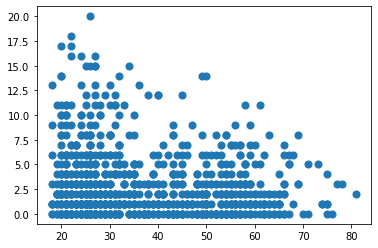

In [ ]:
from sklearn.datasets import make_blobs

X = df['Age'].values

Y = df['DASS_anxiety'].values

plt.scatter(X,Y, s=50, cmap='rainbow');

DASS ANXIETY vs GENDER

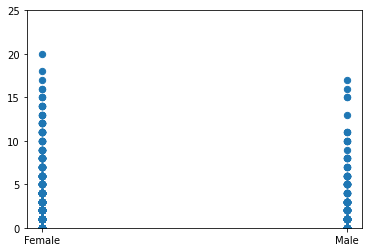

In [ ]:
from sklearn.datasets import make_blobs

X = df['Gender'].values

Y = df['DASS_anxiety'].values

plt.ylim([0.0, 25.0])

plt.xticks([0,1])


plt.scatter(X,Y, s=40, cmap='rainbow');

Although there is little difference, when the susceptibility of women and men to stress is examined, it has been observed that women are slightly more likely to get stressed than men.

**TESTING AND COMPARING DIFFERENT REGRESSION MODELS**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


RANDOM FOREST REGRESSION

In [ ]:
df_c = df.copy()
df_c.replace(to_replace={'Student': 1, 'Other': 2}, inplace=True)
df_c.replace(to_replace={'Male': 0, 'Female': 1}, inplace=True)
df_c.fillna(0,inplace=True)
df_c[['Student','Gender']]= df_c[['Student','Gender']].astype('int64')
df_c= df_c.drop(['DASS_21', 'GHQ_12', 'SEC'],axis=1)
df_c = df_c.drop(['Participant'], axis=1)
df_c =df_c.drop(['Openness','Restraint','Transcendence',
           'Interpersonal'],axis=1)
features = df_c.iloc[:,3:-3]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
Y = df_c['DASS_anxiety']
X = df_c.drop(['DASS_anxiety', 'DASS_stress','DASS_depression'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state = 1)

regression_model2 = RandomForestRegressor( n_estimators= 100  )
regression_model2.fit(X_train, Y_train)
pred2_Y= regression_model2.predict(X_test)
print("Mean absolute error of test is equal to", mean_absolute_error(Y_test, pred2_Y))
pred2_Y_train = regression_model2.predict(X_train)
print("Mean absolute error of train is equal to", mean_absolute_error(Y_train, pred2_Y_train))

mse = mean_squared_error(Y_test, pred2_Y)
mae = mean_absolute_error(Y_test, pred2_Y)
rmse = np.sqrt(mse)

print("\nFinal results:\n")
print("mean squared error of test: {}".format(mse))
print("mean absolute error: {}".format(mae))
print("root of mean squared error: {}".format(rmse))

Mean absolute error of test is equal to 2.5277248677248676
Mean absolute error of train is equal to 0.9562119205298014

Final results:

mean squared error of test: 9.86455238095238
mean absolute error: 2.5277248677248676
root of mean squared error: 3.1407884966919344


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(Y_test, pred2_Y)

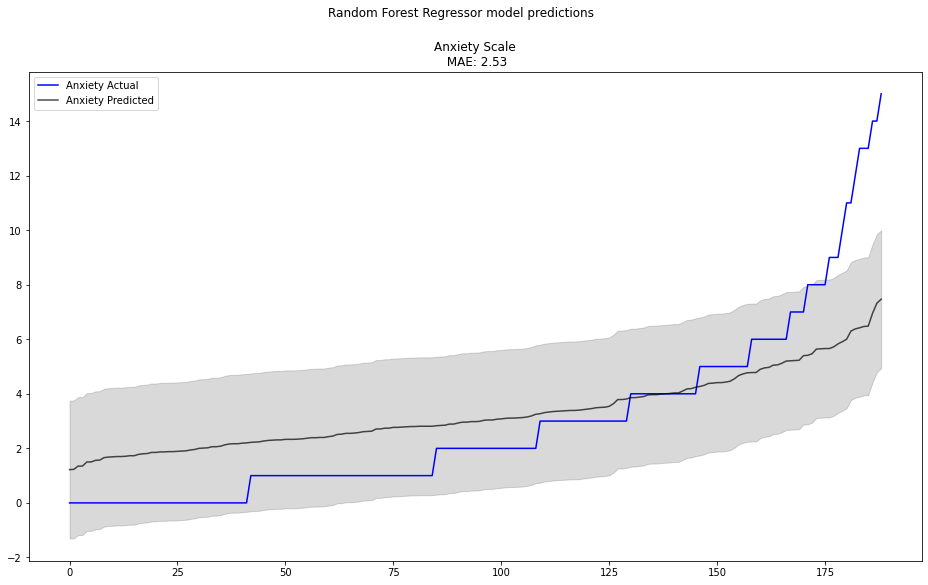

In [ ]:
xx = range(0,len(X_test))
fig, ax = plt.subplots(sharex= True, figsize=(16,9))
fig.suptitle('Random Forest Regressor model predictions')

ax.plot(xx, sorted(Y_test), color='b', label='Anxiety Actual')
ax.plot(xx, sorted(pred2_Y), color='k', label='Anxiety Predicted', alpha=0.7)
ax.fill_between(xx, sorted(pred2_Y)+mae, sorted(pred2_Y)-mae,
                     color = 'k',alpha=0.15)
ax.legend()
ax.set_title('Anxiety Scale\n MAE: {:.2f}'.format(mae))

plt.show()


*K-NEAREST NEIGHBORS REGRESSION*

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

Y = df_c['DASS_anxiety']
X = df_c.drop(['DASS_anxiety', 'DASS_stress','DASS_depression'], axis=1)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

regression_model3 = KNeighborsRegressor( )
regression_model3.fit(X_train,Y_train)
pred3_Y= regression_model3.predict(X_test)
pred3_Y_train = regression_model3.predict(X_train)
print("Mean squared error of test is equal to", mean_squared_error(Y_test,pred3_Y))
print("Mean squared error of train is equal to", mean_squared_error(Y_train,pred3_Y_train))

mse = mean_squared_error(Y_test, pred3_Y)
mae = mean_absolute_error(Y_test, pred3_Y)
rmse = np.sqrt(mse)

print("\nFinal results:\n")
print("mean squared error of test: {}".format(mse))
print("mean absolute error: {}".format(mae))
print("root of mean squared error: {}".format(rmse))

Mean squared error of test is equal to 15.489947089947087
Mean squared error of train is equal to 7.951364238410596

Final results:

mean squared error of test: 15.489947089947087
mean absolute error: 2.7957671957671963
root of mean squared error: 3.935727009073049


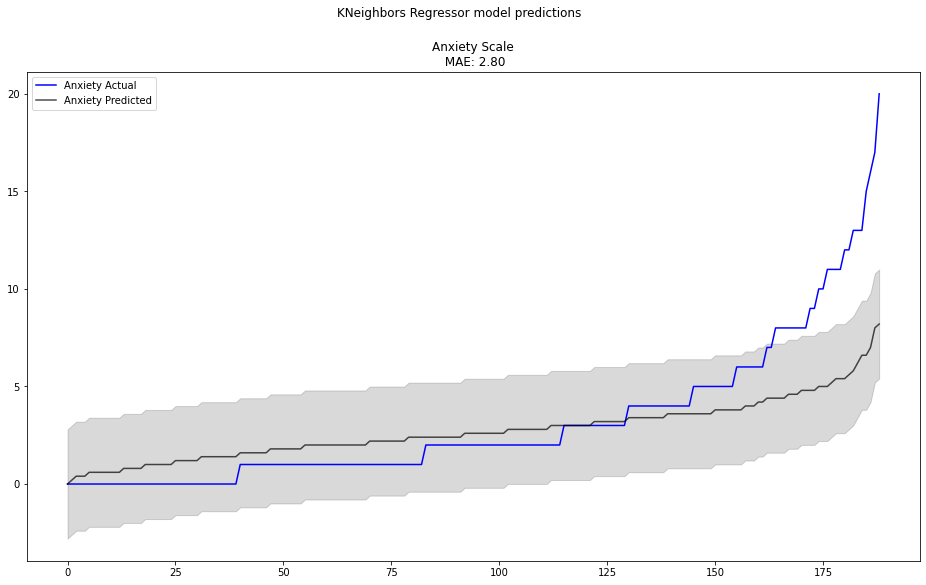

In [ ]:
xx = range(0,len(X_test))
fig, ax = plt.subplots(sharex= True, figsize=(16,9))
fig.suptitle('KNeighbors Regressor model predictions')

ax.plot(xx, sorted(Y_test), color='b', label='Anxiety Actual')
ax.plot(xx, sorted(pred3_Y), color='k', label='Anxiety Predicted', alpha=0.7)
ax.fill_between(xx, sorted(pred3_Y)+mae, sorted(pred3_Y)-mae,
                     color = 'k',alpha=0.15)
ax.legend()
ax.set_title('Anxiety Scale\n MAE: {:.2f}'.format(mae))

plt.show()


OVERALL COMPARISION

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

Y = df_c['DASS_anxiety']
X = df_c.drop(['DASS_anxiety', 'DASS_stress','DASS_depression'], axis=1)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)



reg1 = RandomForestRegressor(n_estimators = 100, max_features =  4, random_state=42)
reg2 = LinearRegression()
reg3=KNeighborsRegressor()


reg1.fit(X_train, Y_train)
reg2.fit(X_train, Y_train)
reg3.fit(X_train, Y_train)


ereg = VotingRegressor([ ("rf", reg1), ("kn", reg3)])
ereg.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_features=4,
                                                   random_state=42)),
                            ('lr', LinearRegression()),
                            ('kn', KNeighborsRegressor())])

In [ ]:
pred1 = reg1.predict(X_test)
pred2 = reg2.predict(X_test)
pred3=reg3.predict(X_test)
pred4 = ereg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Pred1: mse" , mean_squared_error(Y_test, pred1) , "r2", r2_score(Y_test, pred1) )
print("Pred2: mse" , mean_squared_error(Y_test, pred2) , "r2", r2_score(Y_test, pred2) )
print("Pred3: mse" , mean_squared_error(Y_test, pred3) , "r2", r2_score(Y_test, pred3) )
print("Pred4: mse" , mean_squared_error(Y_test, pred4) , "r2", r2_score(Y_test, pred4) )

Pred1: mse 12.9235708994709 r2 0.059054584236958974
Pred2: mse 12.817210292184617 r2 0.06679853725290896
Pred3: mse 15.489947089947087 r2 -0.127799337975117
Pred4: mse 13.124749968060993 r2 0.04440704418708963


**EVALUATION**

CLASSIFICATION ALGORITHMS

We worked on 3 different classification algorithms using DASS levels; Naive Baesian Classification, Decision Tree Classification and Random Forest Classification. Together with the Decision Tree Classification, we examined the effect of the DASS level on the 4 characteristic factors we selected and saw that our accuracy value was low. Finally, using Random Forest Classification, we found that DASS levels were most dependent on openness, trenscedelence, restraint, interpersonal, age, perspective, and spirituality. In addition, Random Forest Classification gave us the most appropriate precision, making it the most logical choice among Classification methods.
The best Machine Learning Algorithm above classification methods is Random Forest Classification model that has the highest accuracy rate with best prediction consistency from the other methods.






REGRESSION ALGORITHMS


Mean Squared Error is the average squared difference between the estimated values and the actual value.
As it can be seen in the above, we have calculated regression results according to different machine learning models. As a result, MSE of the Random Forest Regression is less than K-Nearest Neighbours Regression. Which means that the error between estimated and actual value is less. Due to this reason, Random Forest should be chosen in order to get the best result.





### Results & Discussion

<font color="black">
According to our heatmap, SEC and DASS_21 keys are increasing the DASS Anxiety, Stress and Depression levels significantly. In our final work wee will use machine learning algorithms and try to find the reason and solution for this correlation. 
</font>

In this project, we investigated the relation of mental health and behaviours on lockdown during COVID-19 Period.We invetigated our data according to DASS21 values which is (Depression Anxiety and Stress Scale). During the Pandemic people from different age and gender have been affected differently. Furthermore , DASS values are the best way of examining those effects.




In conclusion, we have observed that there are two features that affect DASS levels which are personality strengths such as openess and characteristic features such as gender, age DASS_anxiety, DASS_stress, DASS_depression levels are depended on these features and changes by correlation over these variables.



All characteristic features and personality strenghts has impact on DASS_levels during the COVID19 pandemic period. Some personalities and characteristics decrease those DASS_levels strongly while others may have stronger/weaker impact on DASS_levels.

Personality strengths have more weight on DASS_levels because when these datas dropped from observation, it is observed that our machine learning algorithm has lower accuracy seen in the RandomForestClassifier methods.Therefore, the personality strengths seen in data must be considered during the study when the algorithm works on data.

DASS_21, SEC AND GHQ datas are the most correlated datas with DASS_levels that can observed from correlation matrix.


In the Bayesian Classification, we examined the effects of people's age and gender on DASS levels. Younger people were more likely to have DASS levels affected than older people. We examined the effect of gender on DASS levels with Bayesian Classification, we observed that there was an effect of gender again, but it was not as big as the effect of age.